In [ ]:
#Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # Thư viện cho vẽ hình
import seaborn as sns
plt.rcParams.update({'figure.figsize':(7,3), 'figure.dpi':120})

In [ ]:
# Link to data
link = 'https://drive.google.com/file/d/1HrxEbtilRdrxrQBLFzX62jB41KbWeALU/view'
# Read data
path = 'https://drive.google.com/uc?export=download&id=' + link.split('/')[-2]
df = pd.read_csv(path)

#Data Inspection

In [ ]:
#Decription data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [ ]:
sampled_df = df.sample(5000, random_state=10)
sampled_df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
201208,201208,Vistara,UK-832,Chennai,Early_Morning,one,Morning,Kolkata,Economy,25.67,36,5937
252951,252951,Air_India,AI-808,Bangalore,Night,one,Morning,Kolkata,Business,12.00,4,60508
149426,149426,Air_India,AI-768,Kolkata,Afternoon,one,Night,Chennai,Economy,8.08,17,8264
229882,229882,Air_India,AI-607,Mumbai,Evening,one,Morning,Delhi,Business,16.17,48,53152
22822,22822,GO_FIRST,G8-113,Delhi,Early_Morning,one,Evening,Kolkata,Economy,10.42,17,5954
...,...,...,...,...,...,...,...,...,...,...,...,...
146981,146981,Air_India,AI-747,Kolkata,Night,one,Night,Hyderabad,Economy,21.00,40,5385
143002,143002,Air_India,AI-402,Kolkata,Morning,one,Night,Hyderabad,Economy,13.17,6,12894
171339,171339,Vistara,UK-876,Hyderabad,Night,one,Morning,Kolkata,Economy,12.08,8,11676
91332,91332,Vistara,UK-858,Bangalore,Early_Morning,one,Afternoon,Delhi,Economy,7.42,37,4111


In [ ]:
np.unique(sampled_df['class'],return_counts=True)

(array(['Business', 'Economy'], dtype=object), array([1516, 3484]))

In [ ]:
sampled_df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [ ]:
sampled_df.describe()

,Unnamed: 0,duration,days_left,price
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,147397.635200,12.348202,25.915200,20442.615800
std,87146.424537,7.253128,13.556075,22381.336811
min,119.000000,0.920000,1.000000,1105.000000
25%,72067.250000,6.830000,14.000000,4799.000000
50%,145723.500000,11.250000,26.000000,7425.000000
75%,223179.500000,16.420000,37.000000,41113.000000
max,300143.000000,39.920000,49.000000,106416.000000


In [ ]:
sampled_df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [ ]:
#  Remove redundant columns
sampled_df = sampled_df.drop(columns=["Unnamed: 0","flight"])

In [ ]:
sampled_df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
201208,Vistara,Chennai,Early_Morning,one,Morning,Kolkata,Economy,25.67,36,5937
252951,Air_India,Bangalore,Night,one,Morning,Kolkata,Business,12.00,4,60508
149426,Air_India,Kolkata,Afternoon,one,Night,Chennai,Economy,8.08,17,8264
229882,Air_India,Mumbai,Evening,one,Morning,Delhi,Business,16.17,48,53152
22822,GO_FIRST,Delhi,Early_Morning,one,Evening,Kolkata,Economy,10.42,17,5954


#Exploring Data

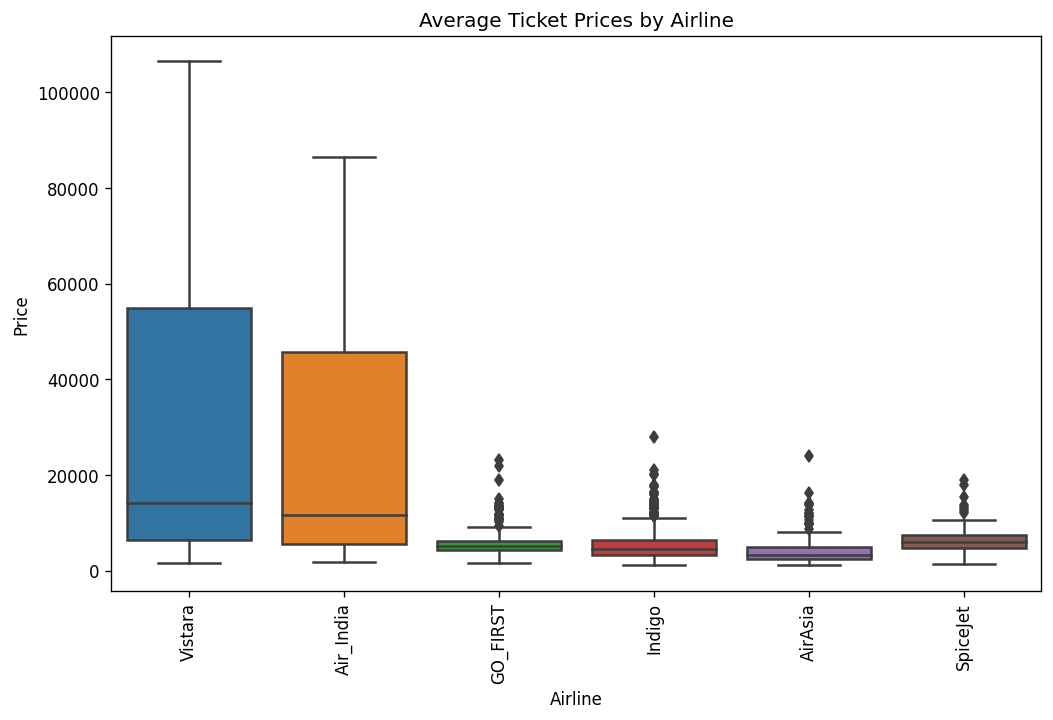

In [ ]:
#Airline Analysis

# Create a bar plot to compare airline prices
plt.figure(figsize=(10,6))
sns.boxplot(data=sampled_df, x='airline', y='price')
plt.title('Average Ticket Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

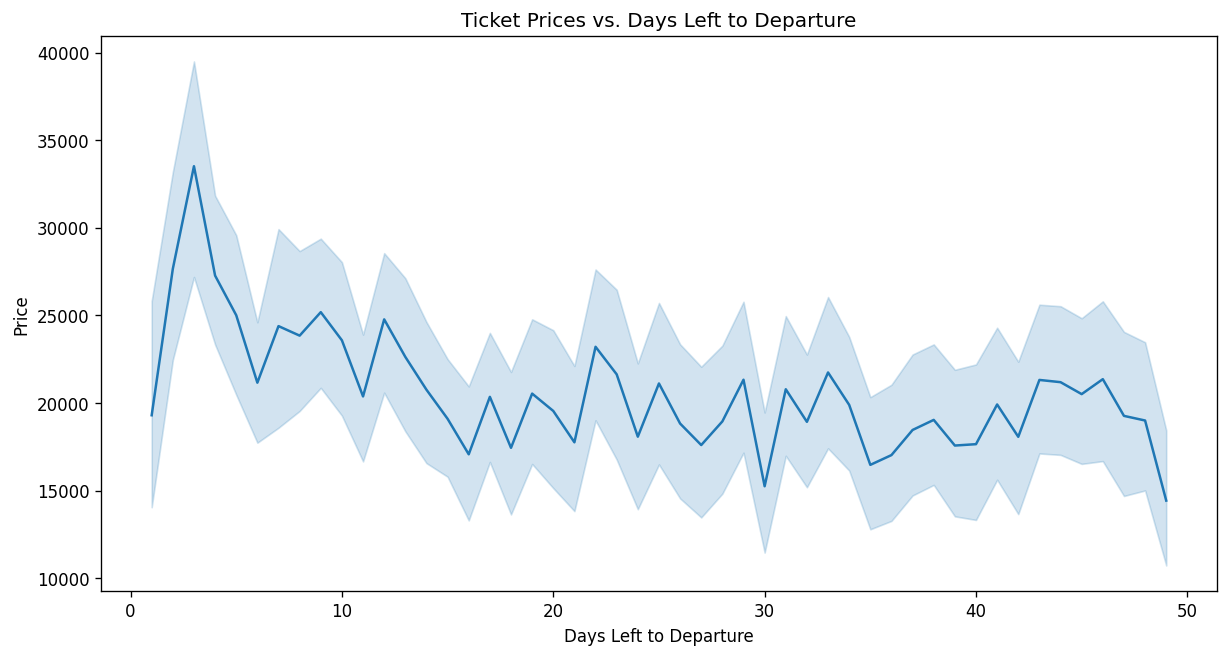

In [ ]:
#Days_left vs Ticket Price

# Create a line plot to visualize price trends based on days left to departure
plt.figure(figsize=(12, 6))
sns.lineplot(x='days_left', y='price', data=sampled_df)
plt.title('Ticket Prices vs. Days Left to Departure')
plt.xlabel('Days Left to Departure')
plt.ylabel('Price')
plt.show()

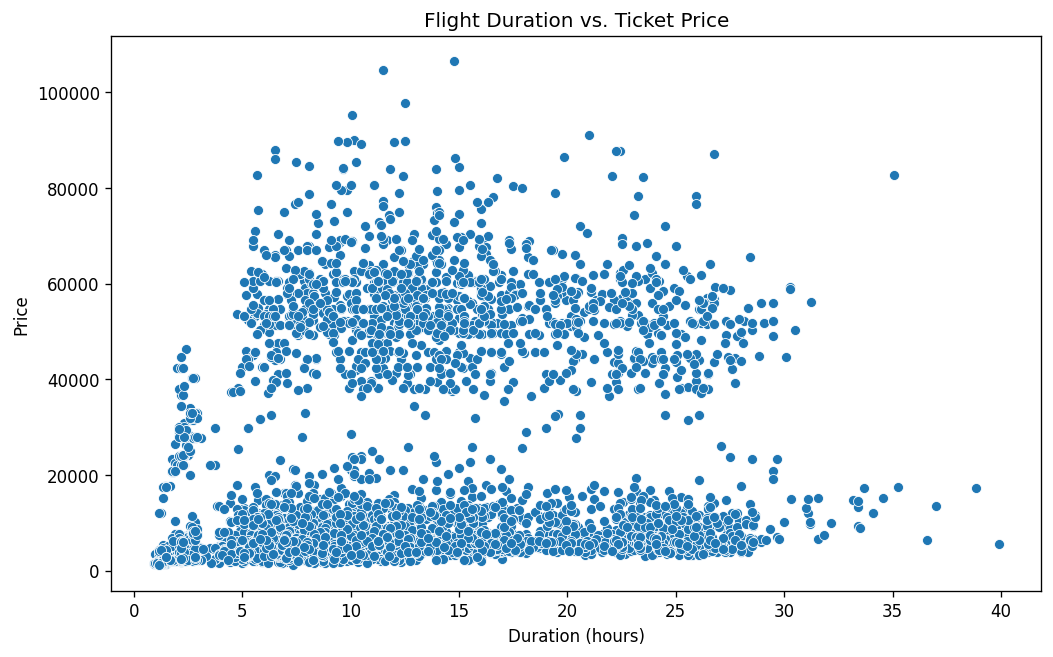

In [ ]:
#Duration vs Price

# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration', y='price', data=sampled_df)
# sns.regplot(x='duration', y='price', data=sampled_df, scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
plt.title('Flight Duration vs. Ticket Price')
plt.xlabel('Duration (hours)')
plt.ylabel('Price')
plt.show()

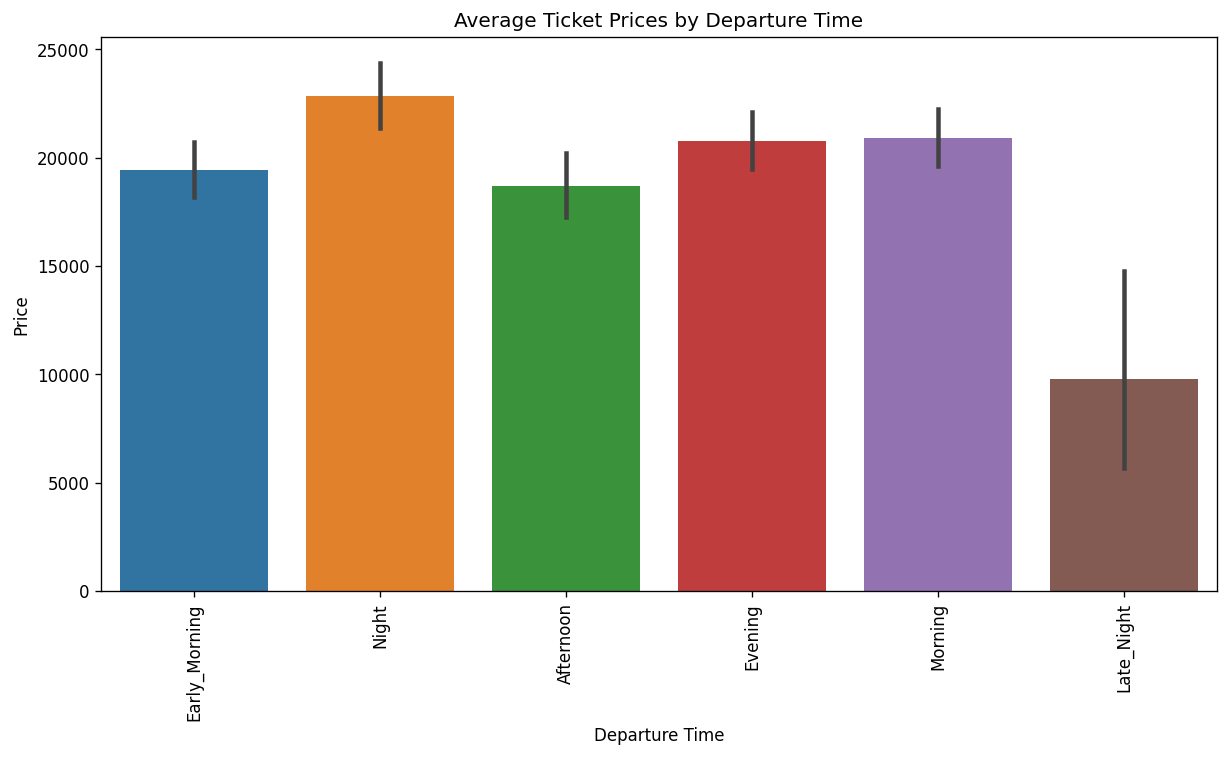

In [ ]:
#Departure Time

# Create a bar plot to compare Departure Time
plt.figure(figsize=(12, 6))
sns.barplot(x='departure_time', y='price', data=sampled_df)
plt.title('Average Ticket Prices by Departure Time')
plt.xlabel('Departure Time')
plt.ylabel('Price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

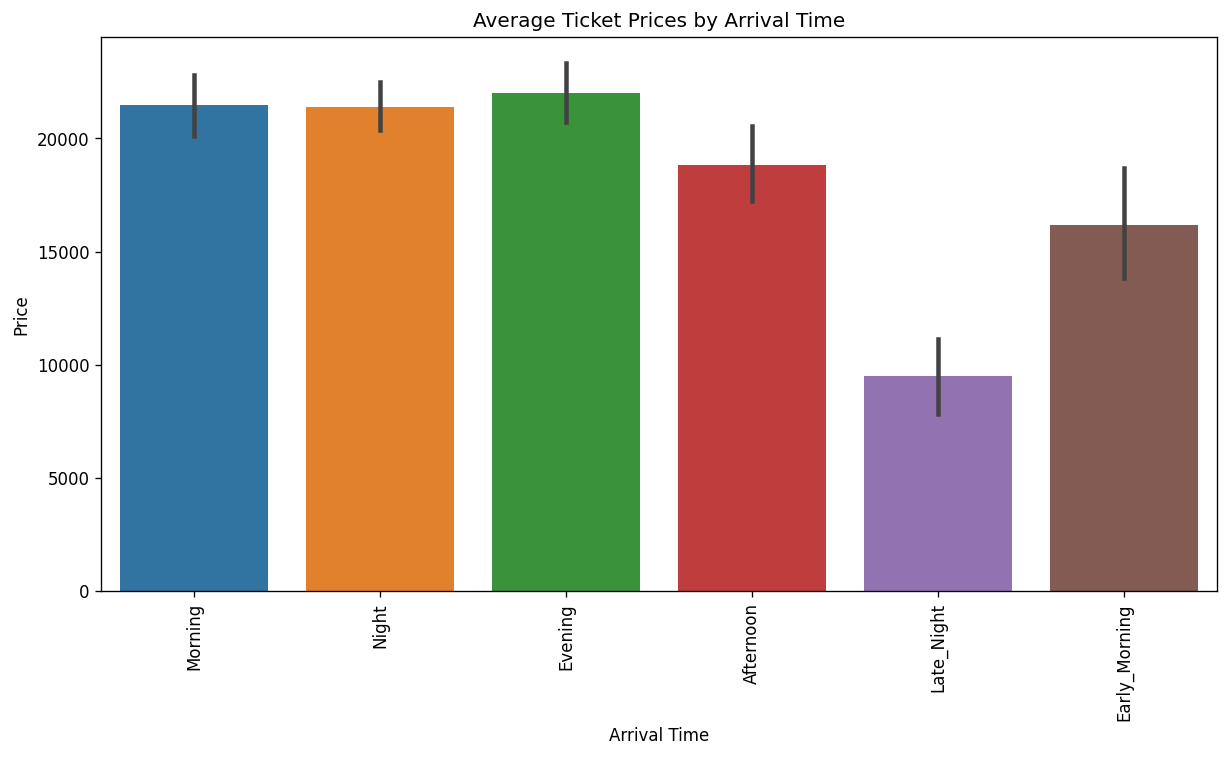

In [ ]:
#Arrival Time

# Create a bar plot to compare Departure Time
plt.figure(figsize=(12, 6))
sns.barplot(x='arrival_time', y='price', data=sampled_df)
plt.title('Average Ticket Prices by Arrival Time')
plt.xlabel('Arrival Time')
plt.ylabel('Price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

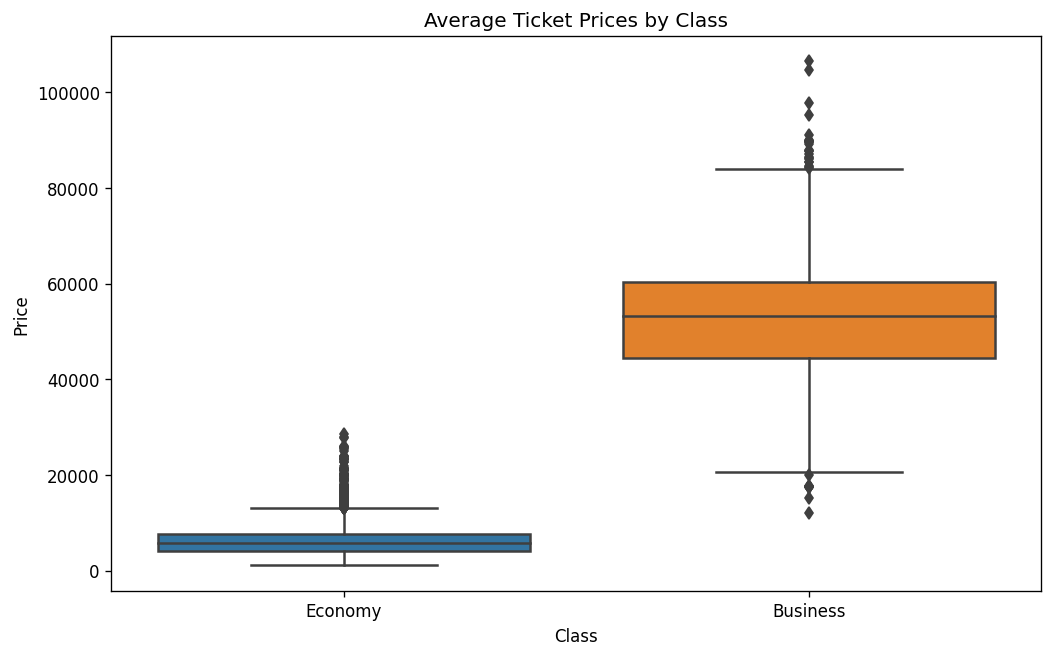

In [ ]:
#Class Analysis

# Create a bar plot to compare class prices
plt.figure(figsize=(10,6))
sns.boxplot(data=sampled_df, x='class', y='price')
plt.title('Average Ticket Prices by Class')
plt.xlabel('Class')
plt.ylabel('Price')
# plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

# Preprocessing


In [ ]:
#Cân nhắc remove duplicated nếu cần
# df.duplicated().sum()
sampled_df[sampled_df.duplicated()]

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
154413,Indigo,Hyderabad,Afternoon,zero,Evening,Delhi,Economy,2.25,19,2694


In [ ]:
#encoder str feature
from sklearn.preprocessing import LabelEncoder
lec = LabelEncoder()
for col, dtype in list(sampled_df.dtypes.items()):
  if (dtype == 'object' and col != 'class'):
    sampled_df[col] = lec.fit_transform(sampled_df[col])

sampled_df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
201208,5,1,1,0,4,4,Economy,25.67,36,5937
252951,1,0,5,0,4,4,Business,12.00,4,60508
149426,1,4,0,0,5,1,Economy,8.08,17,8264
229882,1,5,2,0,4,2,Business,16.17,48,53152
22822,2,2,1,0,2,4,Economy,10.42,17,5954
...,...,...,...,...,...,...,...,...,...,...
146981,1,4,5,0,5,3,Economy,21.00,40,5385
143002,1,4,4,0,5,3,Economy,13.17,6,12894
171339,5,3,5,0,4,4,Economy,12.08,8,11676
91332,5,0,1,0,0,2,Economy,7.42,37,4111


In [ ]:
sampled_df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
201208,5,1,1,0,4,4,Economy,25.67,36,5937
252951,1,0,5,0,4,4,Business,12.00,4,60508
149426,1,4,0,0,5,1,Economy,8.08,17,8264
229882,1,5,2,0,4,2,Business,16.17,48,53152
22822,2,2,1,0,2,4,Economy,10.42,17,5954
...,...,...,...,...,...,...,...,...,...,...
146981,1,4,5,0,5,3,Economy,21.00,40,5385
143002,1,4,4,0,5,3,Economy,13.17,6,12894
171339,5,3,5,0,4,4,Economy,12.08,8,11676
91332,5,0,1,0,0,2,Economy,7.42,37,4111


In [ ]:
## Handle class features
sampled_df['class'].unique()

#Convert Economy -> 0, Business ->1
sampled_df['class'] = df['class'].replace({'Economy': 0, 'Business': 1})

print(sampled_df)

        airline  source_city  departure_time  stops  arrival_time  \
201208        5            1               1      0             4   
252951        1            0               5      0             4   
149426        1            4               0      0             5   
229882        1            5               2      0             4   
22822         2            2               1      0             2   
...         ...          ...             ...    ...           ...   
146981        1            4               5      0             5   
143002        1            4               4      0             5   
171339        5            3               5      0             4   
91332         5            0               1      0             0   
53887         1            5               1      0             4   

        destination_city  class  duration  days_left  price  
201208                 4      0     25.67         36   5937  
252951                 4      1     12.00      

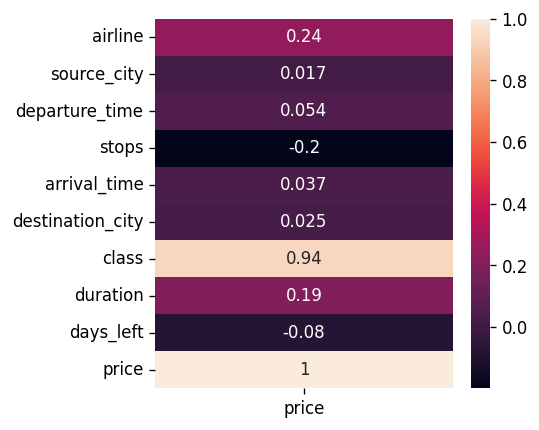

In [ ]:
## Corr after encoder
plt.figure(figsize=(4,4))
sns.heatmap(sampled_df.corr()[["price"]], annot=True)
plt.show()

## Outlier

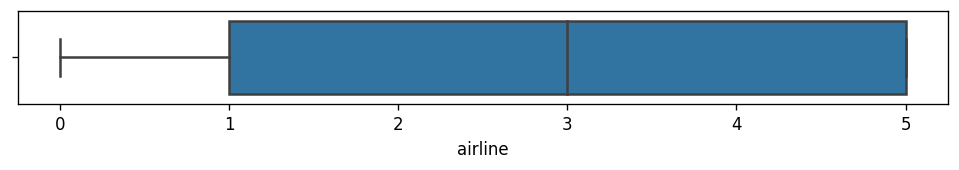

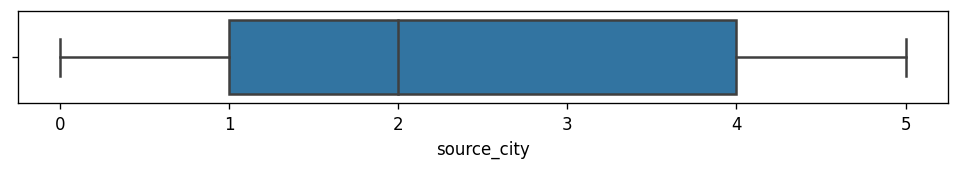

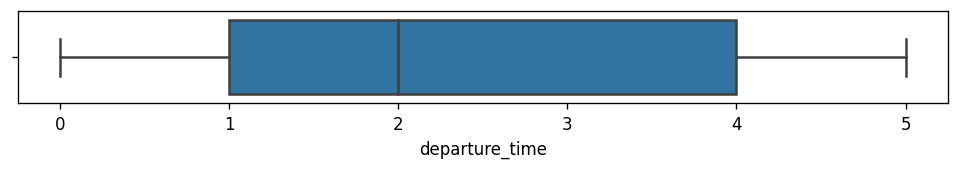

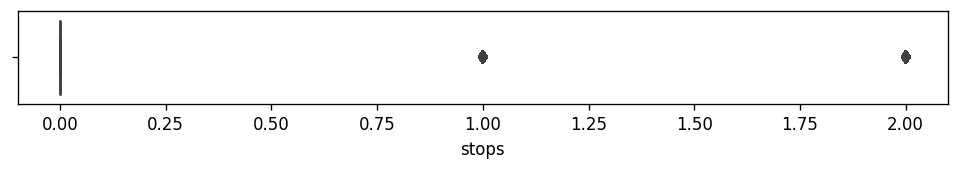

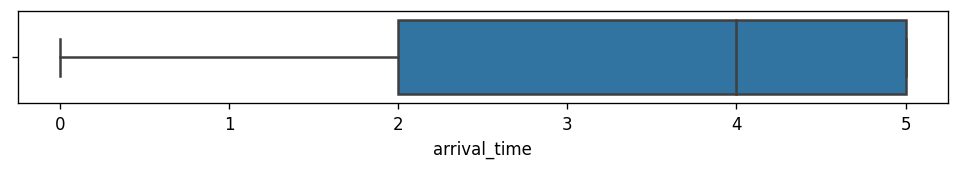

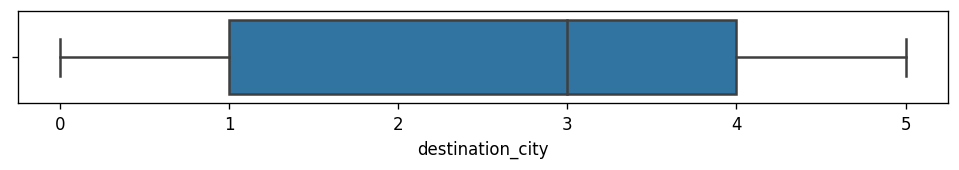

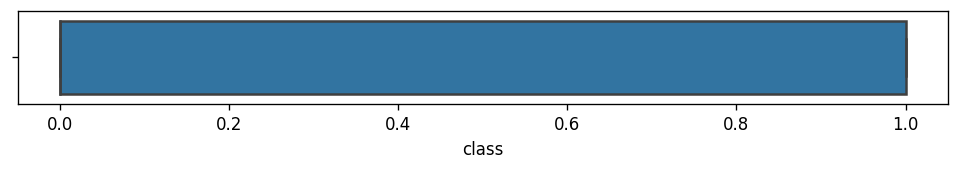

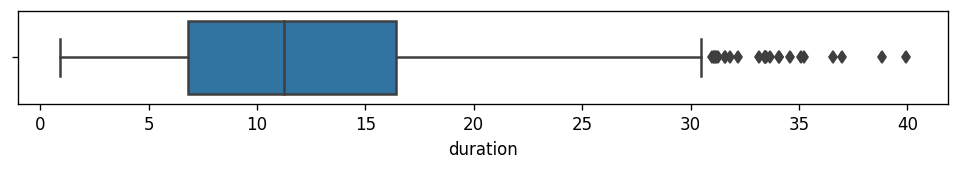

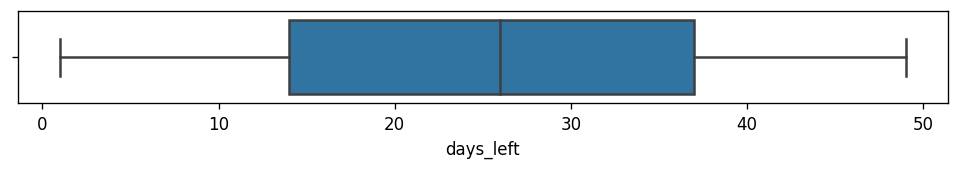

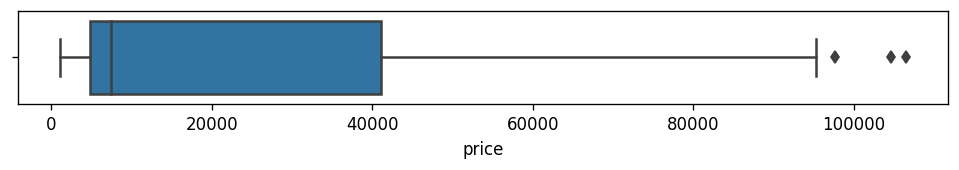

In [ ]:
# Check outlier
# (Tham khảo https://www.kaggle.com/code/eslamfouad/flight-price-prediction-rfr#Outliers)
# https://www.kaggle.com/code/sunkavallikowshik/flight-fare-prediction-detailed-analysis-and-model#4.3-Convert-Total_Stops-from-%22categorical%22-to-%22numerical%22

#Showing boxplot for each column
for column in sampled_df:
        plt.figure(figsize=(10,1))
        sns.boxplot(data=sampled_df, x=column)

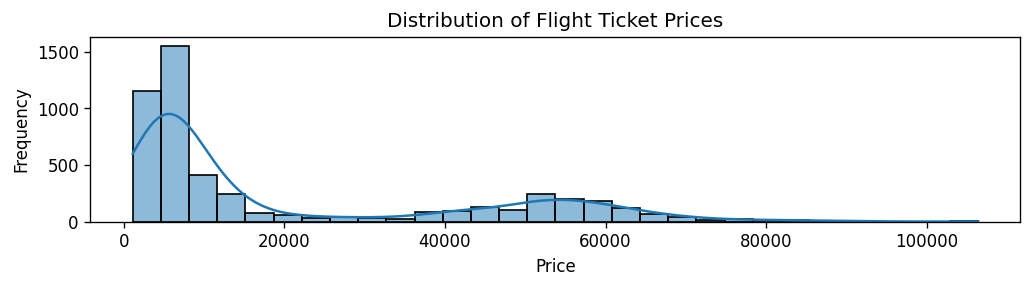

In [ ]:
# Create a histogram of Price
plt.figure(figsize=(10, 2))
sns.histplot(sampled_df['price'], bins=30, kde=True)
plt.title('Distribution of Flight Ticket Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


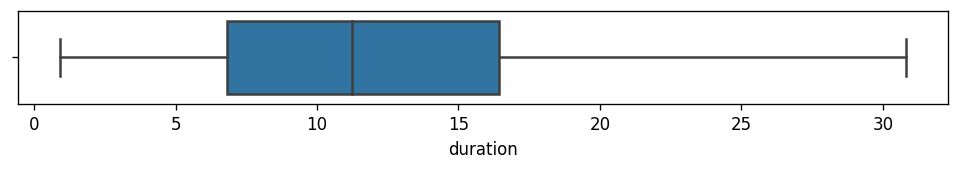

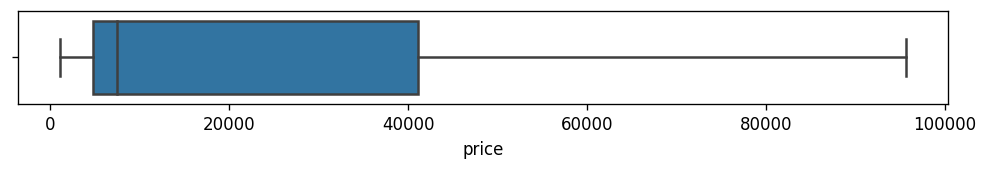

In [ ]:
## Column that need to be handle
## IQR (Interquartile Range):
outlier_features = ["duration", "price"]

# df_org = df.copy()

for col in sampled_df[outlier_features]:
    q1 = sampled_df[col].quantile(0.25)
    q3 = sampled_df[col].quantile(0.75)
    iqr = q3 - q1
    whisker_width = 1.5
    lower_whisker = q1 - (whisker_width * iqr)
    upper_whisker = q3 + whisker_width * iqr
    sampled_df[col] = np.where(sampled_df[col] > upper_whisker, upper_whisker, np.where(sampled_df[col] < lower_whisker, lower_whisker, sampled_df[col]))


# print out result
for column in sampled_df[outlier_features]:
        plt.figure(figsize=(10,1))
        sns.boxplot(data = sampled_df, x = column)

# for column in sampled_df_org[outlier_features]:
#         plt.figure(figsize=(15,1))
#         sns.boxplot(data = sampled_df_org, x = column)

In [ ]:
#preparation data

X = sampled_df[['airline', 'source_city', 'departure_time',
      'stops', 'arrival_time', 'destination_city', 'class', 'duration',
      'days_left']]
y = sampled_df[['price']]



In [ ]:
#Split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3, random_state=42
)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Models

##Helpers

In [ ]:
def plot_feature_importance(importance,names,model_type):
  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

#Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
  plt.figure(figsize=(10,8))
#Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
  plt.title(model_type + ' '+'FEATURE IMPORTANCE')
  plt.xlabel('Feature Importance')
  plt.ylabel('Feature Name')

## Linear Regression (OLS)

In [ ]:
from sklearn.linear_model import LinearRegression
model_multiple = LinearRegression() #Define model
#training model
model_multiple.fit(X_train, y_train)
y_train_pred = model_multiple.predict(X_train) #cho mô hình dự đoán và lưu kết quả ra biến y_pred

In [ ]:
model_multiple.coef_

array([[ 4471.63135647,   740.99401362,  -124.00452743, -6516.33367833,
          437.71200922,   798.4308799 , 44348.14453561,  2379.28985018,
        -5882.71132996]])

In [ ]:
from sklearn.metrics import r2_score
acc = r2_score(y_train, y_train_pred)

print('R2_score',acc)
# print(y_pred.summary())

R2_score 0.9010282423533515


In [ ]:
# MSE = Mean Square Error
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(y_train, y_train_pred)
rmse = math.sqrt(mean_squared_error(y_train, y_train_pred))
print(mse)
print(rmse)

49730735.40841758
7052.002226915246


In [ ]:
y_test_pred = model_multiple.predict(X_test)
from sklearn.metrics import r2_score
acc = r2_score(y_test, y_test_pred)

print('R2_score:',acc)

mse = mean_squared_error(y_test, y_test_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_test_pred))

print('MSE:',mse)
print('RMSE:',rmse)

R2_score: 0.9045985199554405
MSE: 47187670.92667664
RMSE: 6869.328273323137


# **SUPPORT VECTOR REGRESSION**

In [ ]:
from sklearn.svm import SVR
model_svr = SVR(kernel='linear', C=0.1) # set kernel and epsilon
model_svr.fit(X_train, y_train.values.ravel())
y_svr_pred = model_svr.predict(X_test)

In [ ]:
y_svr_pred

array([7547.58419901, 7407.82345286, 7450.15966212, ..., 7558.14253296,
       7518.94507638, 7395.64306917])

In [ ]:
y_train.values.ravel()

array([ 4935.,  5745.,  6024., ...,  9055., 49725.,  2276.])

In [ ]:
y_test.values.ravel()

array([59021.,  5523.,  6840., ..., 44144., 26206.,  2480.])

In [ ]:
#Tính toán độ chính xác
from sklearn.metrics import r2_score
Acc_svr = r2_score(y_test.values.ravel(), y_svr_pred)
print('The accuracy of this model is:R-square=',"{:.2f}".format(Acc_svr))

The accuracy of this model is:R-square= -0.33


In [ ]:
mse_svr = mean_squared_error(y_test, y_svr_pred)
rmse_svr = math.sqrt(mean_squared_error(y_test, y_svr_pred))

print('MSE:',mse_svr)
print('RMSE:',rmse_svr)

MSE: 658171147.7219077
RMSE: 25654.846476288018


# **RANDOM FOREST REGRESSION**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(
    n_estimators=10,
)
model_rf.fit(X_train,y_train.values.ravel())

y_train_rf_pred = model_rf.predict(X_train) #cho mô hình dự đoán và lưu kết quả ra biến y_pred

acc_rf = r2_score(y_train.values.ravel(), y_train_rf_pred)

print('R2_score_rf:',acc_rf)

mse_train_rf = mean_squared_error(y_train.values.ravel(), y_train_rf_pred)
rmse_train_rf = math.sqrt(mean_squared_error(y_train.values.ravel(), y_train_rf_pred))
print(mse_train_rf)
print(rmse_train_rf)

R2_score_rf: 0.9916399552802404
4200705.149091429
2049.5621847339567


In [ ]:
y_test_rf_pred = model_rf.predict(X_test)

acc_test_rf = r2_score(y_test.values.ravel(), y_test_rf_pred)

print('R2_score_rf:',acc_test_rf)

mse_test_rf = mean_squared_error(y_test.values.ravel(), y_test_rf_pred)
rmse_test_rf = math.sqrt(mean_squared_error(y_test.values.ravel(), y_test_rf_pred))
print(mse_test_rf)
print(rmse_test_rf)

R2_score_rf: 0.9444642742326477
27469191.7878
5241.105969907497


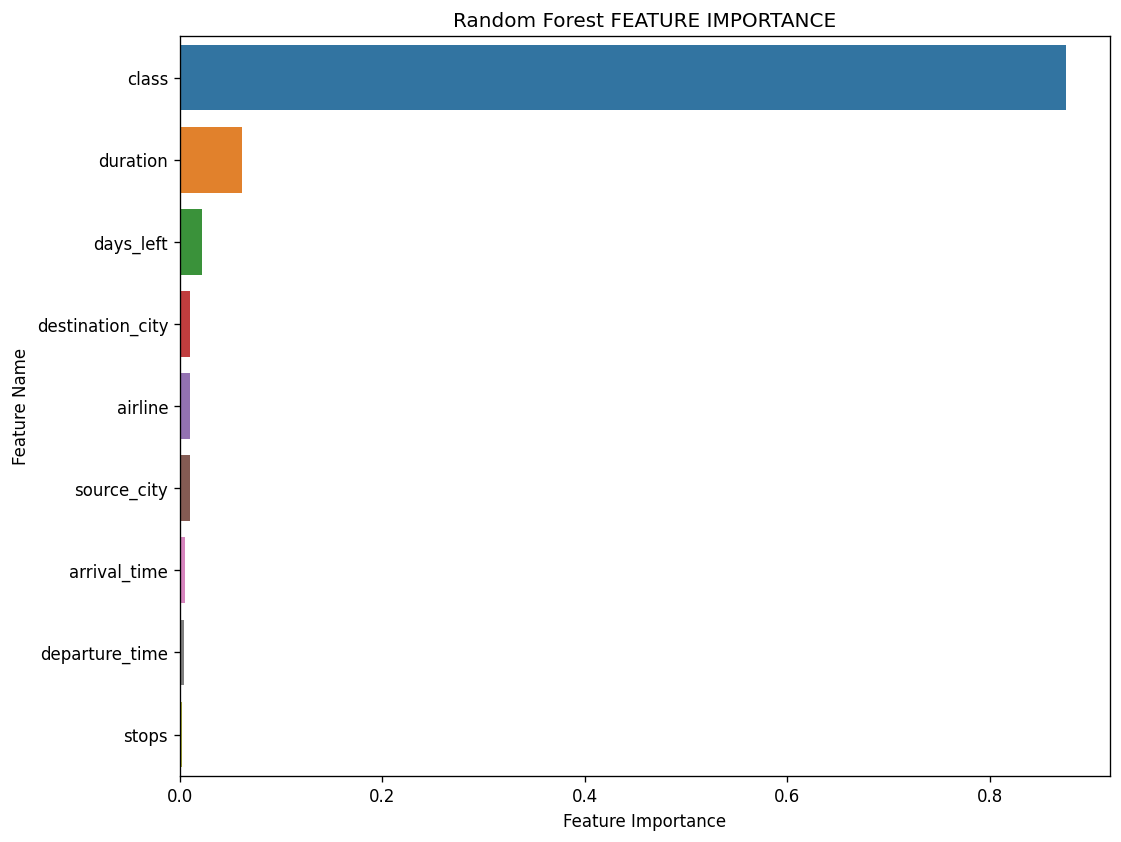

In [ ]:
fi = model_rf.feature_importances_  # gán các feature quan trọng vào biến fi
feature_names = sampled_df.columns[:-1].values
feature_names[np.flip(np.argsort(fi))]

plot_feature_importance(fi,feature_names, "Random Forest")

# **DESICION TREE REGRESSION**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_tree = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
)
model_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [ ]:
y_tree_train_pred = model_tree.predict(X_train)

acc_tree_train = r2_score(y_train.values.ravel(), y_tree_train_pred)

print('R2_score_tree_train:',acc_tree_train)

mse_train_tree = mean_squared_error(y_train.values.ravel(), y_tree_train_pred)
rmse_train_tree = math.sqrt(mean_squared_error(y_train.values.ravel(), y_tree_train_pred))
print(mse_train_tree)
print(rmse_train_tree)



R2_score_tree_train: 0.9472752672215132
26492807.62141984
5147.116437523037


In [ ]:
y_test_tree_pred = model_tree.predict(X_test)

acc_test_tree = r2_score(y_test.values.ravel(), y_test_tree_pred)

print('R2_score_tree_test:',acc_test_tree)

mse_test_tree = mean_squared_error(y_test.values.ravel(), y_test_tree_pred)
rmse_test_tree = math.sqrt(mean_squared_error(y_test.values.ravel(), y_test_tree_pred))
print(mse_test_tree)
print(rmse_test_tree)

R2_score_tree_test: 0.9398669047658003
29743151.871318836
5453.728254260459


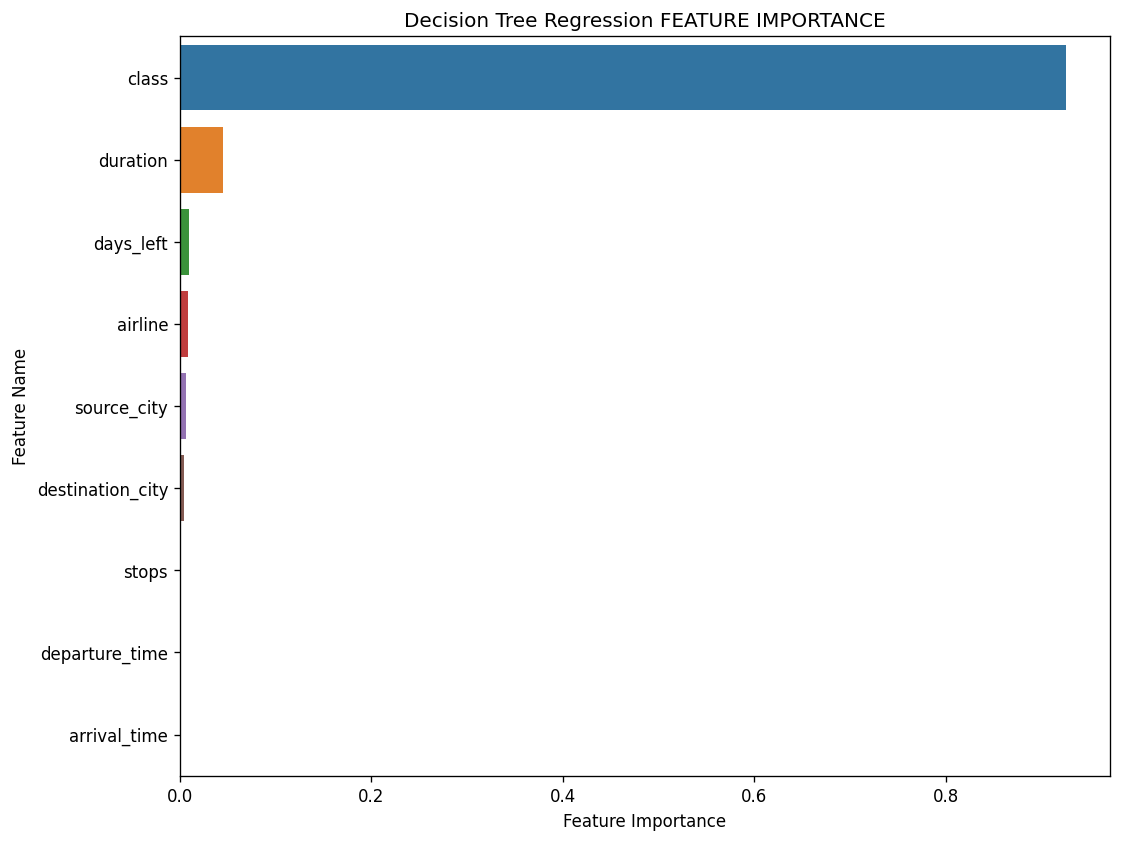

In [ ]:
## Feature Importance
fi = model_tree.feature_importances_
feature_names = sampled_df.columns[:-1].values
feature_names[np.flip(np.argsort(fi))]

## Chart
plot_feature_importance(fi,feature_names, "Decision Tree Regression")

In [ ]:
# fine-tuning model
from sklearn.model_selection import RandomizedSearchCV
space = {
    'n_estimators': [50, 100, 150, 250, 1000],
    # 'learning_rate': [0.01, 0.1, 1],
}
rand_search_rf = RandomizedSearchCV(
    estimator=model_rf,
    param_distributions=space,
    n_iter=10,
    cv=3,
    verbose=3
)

rand_search_rf.fit(X_train, y_train)

rand_search_rf.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 1/3] END ...................n_estimators=50;, score=0.943 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END ...................n_estimators=50;, score=0.955 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END ...................n_estimators=50;, score=0.954 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END ..................n_estimators=100;, score=0.944 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END ..................n_estimators=100;, score=0.956 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END ..................n_estimators=100;, score=0.956 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END ..................n_estimators=150;, score=0.944 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END ..................n_estimators=150;, score=0.956 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END ..................n_estimators=150;, score=0.955 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END ..................n_estimators=250;, score=0.944 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END ..................n_estimators=250;, score=0.955 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END ..................n_estimators=250;, score=0.956 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END .................n_estimators=1000;, score=0.944 total time=   9.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END .................n_estimators=1000;, score=0.956 total time=   8.0s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END .................n_estimators=1000;, score=0.956 total time=   9.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomForestRegressor(n_estimators=1000)

In [ ]:
rand_search_rf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 1/3] END ...................n_estimators=50;, score=0.943 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END ...................n_estimators=50;, score=0.954 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END ...................n_estimators=50;, score=0.955 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END ..................n_estimators=100;, score=0.944 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END ..................n_estimators=100;, score=0.955 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END ..................n_estimators=100;, score=0.955 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END ..................n_estimators=150;, score=0.944 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END ..................n_estimators=150;, score=0.956 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END ..................n_estimators=150;, score=0.955 total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END ..................n_estimators=250;, score=0.944 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END ..................n_estimators=250;, score=0.956 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END ..................n_estimators=250;, score=0.955 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END .................n_estimators=1000;, score=0.944 total time=   9.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END .................n_estimators=1000;, score=0.956 total time=   8.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END .................n_estimators=1000;, score=0.955 total time=   9.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(n_estimators=10),
                   param_distributions={'n_estimators': [50, 100, 150, 250,
                                                         1000]},
                   verbose=3)

In [ ]:
rand_search_rf.best_estimator_

RandomForestRegressor(n_estimators=1000)

In [ ]:
# evaluate fine-tuned
from sklearn.metrics import r2_score, mean_squared_error
y_pred_rf_ft = rand_search_rf.predict(X_test)
print(r2_score(y_test.values.ravel(), y_pred_rf_ft))
print(mean_squared_error(y_test.values.ravel(), y_pred_rf_ft))
print(math.sqrt(mean_squared_error(y_test.values.ravel(), y_pred_rf_ft)))


0.9500109353212971
24725691.18308463
4972.49345731944
